In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# load datasets
train_set = datasets.MNIST("./mnist/train", train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST("./mnist/test", train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 126155976.32it/s]


Extracting ./mnist/train/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33592815.81it/s]


Extracting ./mnist/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 15838705.12it/s]


Extracting ./mnist/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16199429.22it/s]


Extracting ./mnist/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 131900963.33it/s]

Extracting ./mnist/test/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/test/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30713918.31it/s]


Extracting ./mnist/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/test/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32469431.01it/s]


Extracting ./mnist/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/test/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12700352.51it/s]

Extracting ./mnist/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/test/MNIST/raw



In [ ]:
# generate indices: instead of the actual data we pass in integers instead
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_set)),
    train_set.targets,
    stratify=train_set.targets,
    train_size=0.8,
)

# generate subset based on indices
train_split = Subset(train_set, train_indices)
val_split = Subset(train_set, val_indices)

In [ ]:
train_loader = DataLoader(train_split, batch_size=128)
val_loader = DataLoader(val_split, batch_size=128)
test_loader = DataLoader(test_set, batch_size=128)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define the model
class CNN(nn.Module):
  def __init__(self, output_size):
    super(CNN, self).__init__()
    """
        Begining of of Implement
        1. Implement self.conv1/2/3, self.pool1/2/3 with channel numbers 16, 32, 64 respectively, using kernel sizes 3, 4, 2 respectively (stride=1 and padding=0).
        2. Use MaxPool with a shape of (2, 2) for self.pool1/2/3.
        3. Add a hidden linear layer with 1000 neurons before the output layer.
        4. Set self.output as the softmax operator.
    """

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)
    self.pool1 = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=1, padding=0)
    self.pool2 = nn.MaxPool2d(2, 2)

    self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=1, padding=0)
    self.pool3 = nn.MaxPool2d(2, 2)

    self.fc1 = nn.Linear(in_features=256, out_features=1000)
    self.fc2 = nn.Linear(in_features=1000, out_features=10)

    self.output = nn.Softmax(dim=1)

    """
        End of Implement
    """


  def forward(self, x):
    batchsize = x.shape[0]
    """
        Begining of of Implement
        excecute the forward step:
        1. Use ReLU activation after convolution and before pooling.
        2. Reshape the data before feeding it into the linear layer.
        3. Output the results using self.output.

    """

    x = self.conv1(x)
    x = nn.functional.relu(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = nn.functional.relu(x)
    x = self.pool2(x)

    x = self.conv3(x)
    x = nn.functional.relu(x)
    x = self.pool3(x)

    x = torch.flatten(x, 1)

    x = self.fc1(x)
    x = nn.functional.relu(x)
    x = self.fc2(x)


    x = self.output(x)
    return x

    """
        End of Implement
    """

In [ ]:
# Training function
def train(model, criterion, optimizer, train_loader, val_loader, n_epochs):
    train_acc, val_acc = [], []
    for epoch in range(n_epochs):
        # Training
        model.train()
        correct, total = 0, 0
        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            """
            Begining of of Implement
            excecute the forward computation:
            1. get the model outputs -> variable 'outputs';
            2. change the format of labels to one hot -> variable 'labels_onehot';
            3. compute loss -> variable 'loss'
            """
            outputs = model(inputs)

            labels_onehot_long = nn.functional.one_hot(labels)
            labels_onehot = labels_onehot_long.float()

            loss = criterion(outputs, labels_onehot)

            """
            End of Implement
            """





            """
            Begining of of Implement
            do the optimization step:
            1. clean the old/previous gradient;
            2. compute the current gradient (backward propagation)
            3. update the parameter
            """

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            """
            End of Implement
            """




            """
            Begining of of Implement
            get the predicted labels of the training data from variable 'outputs' -> variable 'predicted'

            """

            _, predicted = torch.max(outputs.data, 1)

            """
            End of Implement
            """

            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            if idx % 100 == 0:
                print(f"epoch: {epoch}, loss: {loss:.2f}, train_acc: {(correct/total):.2f}")

        train_acc.append(correct/total)

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                """
                Begining of of Implement
                1. get the model outputs -> variable 'outputs';
                2. get the predicted labels -> predicted
                """

                outputs = model(inputs)

                _, predicted = torch.max(outputs.data, 1)

                """
                End of Implement
                """

                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        val_acc.append(correct/total)

    return train_acc, val_acc

In [ ]:
# Testing function
def test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            """
            Begining of of Implement
            1. get the model outputs -> variable 'outputs';
            2. get the predicted labels -> predicted
            """

            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)

            """
            End of Implement
            """

            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct/total

epoch: 0, loss: 0.09, train_acc: 0.11
epoch: 0, loss: 0.01, train_acc: 0.75
epoch: 0, loss: 0.01, train_acc: 0.84
epoch: 0, loss: 0.01, train_acc: 0.88
epoch: 1, loss: 0.01, train_acc: 0.96
epoch: 1, loss: 0.00, train_acc: 0.97
epoch: 1, loss: 0.01, train_acc: 0.97
epoch: 1, loss: 0.00, train_acc: 0.97
epoch: 2, loss: 0.00, train_acc: 0.98
epoch: 2, loss: 0.00, train_acc: 0.98
epoch: 2, loss: 0.00, train_acc: 0.98
epoch: 2, loss: 0.00, train_acc: 0.98
epoch: 3, loss: 0.00, train_acc: 0.98
epoch: 3, loss: 0.00, train_acc: 0.98
epoch: 3, loss: 0.00, train_acc: 0.98
epoch: 3, loss: 0.00, train_acc: 0.98
epoch: 4, loss: 0.00, train_acc: 0.99
epoch: 4, loss: 0.00, train_acc: 0.99
epoch: 4, loss: 0.00, train_acc: 0.99
epoch: 4, loss: 0.00, train_acc: 0.99


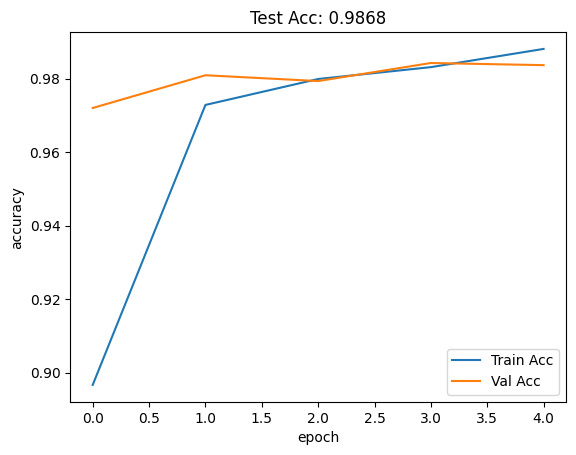

In [ ]:
# Hyperparameters
output_size = 10
n_epochs = 5
lr = 0.001

# Training, Validation, and Testing
model = CNN(output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train_acc, val_acc = train(model, criterion, optimizer, train_loader, val_loader, n_epochs)
test_acc = test(model, test_loader)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend(loc='lower right')
plt.title(f'Test Acc: {test_acc}')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()